## Supervised ML Models  

In [15]:
import pandas as pd
import numpy as np

In [16]:
mck = pd.read_csv('Model_Mck.csv')

In [17]:
mck.head()

,Unnamed: 0,weekday_key,hour_key,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,driver_origin_dist
0,0,0,22,2.101701,4.379502,Economy,private,1,0.001136
1,1,0,19,0.291998,2.145089,Standard,private,1,-1.322208
2,2,1,5,4.382374,6.544562,Economy,private,0,1.289408
3,3,2,19,0.931903,2.116213,Economy,private,1,-0.270352
4,4,3,7,2.883368,3.972901,Standard,private,0,1.086685


In [18]:
mck = mck.drop('Unnamed: 0', axis = 1)

In [19]:
mck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628103 entries, 0 to 628102
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   weekday_key         628103 non-null  int64  
 1   hour_key            628103 non-null  int64  
 2   distance_km         628103 non-null  float64
 3   duration_min        628103 non-null  float64
 4   offer_class_group   628103 non-null  object 
 5   ride_type_desc      628103 non-null  object 
 6   driver_response     628103 non-null  int64  
 7   driver_origin_dist  628103 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 38.3+ MB


In [20]:
# Convert offer_class_group   & ride_type_desc  use  Lable Encoding

In [21]:
from sklearn import preprocessing

In [22]:
# Label encoding 

label = preprocessing.LabelEncoder()

In [23]:
# For variables offer_class_group   & ride_type_desc

coloums = ['offer_class_group', 'ride_type_desc']

mck[coloums] = mck[coloums].apply(label.fit_transform)

#mck['offer_class_group'] = label.fit_transform(mck['offer_class_group'])

mck.head()

,weekday_key,hour_key,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,driver_origin_dist
0,0,22,2.101701,4.379502,1,2,1,0.001136
1,0,19,0.291998,2.145089,4,2,1,-1.322208
2,1,5,4.382374,6.544562,1,2,0,1.289408
3,2,19,0.931903,2.116213,1,2,1,-0.270352
4,3,7,2.883368,3.972901,4,2,0,1.086685


create  Train and test datasets

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
y = mck.driver_response   # Dependent Variable
x = mck.drop('driver_response', axis = 1)     # Independent Variables [Dropped driver_response]

In [26]:
# Split dataset into 70:30 to Train:Test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

x_train.head()

,weekday_key,hour_key,distance_km,duration_min,offer_class_group,ride_type_desc,driver_origin_dist
349923,1,19,2.792010,5.629253,4,2,0.095607
121710,3,17,0.125871,1.722339,1,2,-0.115162
578964,5,11,0.834067,2.505327,1,2,0.274492
278614,0,9,2.455595,4.997278,4,2,-0.788656
269793,3,21,3.191803,5.833321,1,2,-0.735492


In [27]:
y_train.head()

349923    1
121710    1
578964    1
278614    0
269793    0
Name: driver_response, dtype: int64

In [28]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(502482, 7) (125621, 7) (502482,) (125621,)


## Logistic Regression - ML Model

In [36]:
from sklearn.linear_model import LogisticRegression

In [47]:
model1 = LogisticRegression()

model1.fit(x_train, y_train)

LogisticRegression()

In [48]:
# Predict the results for Logistic Regression 

y_pred = model1.predict(x_test)

In [49]:
# Model Evaluation

from sklearn import metrics as mtr

In [50]:
# Confusion Matrix

print('Confusion Matrix:' ,mtr.confusion_matrix(y_test, y_pred))

print('Accuracy:' ,mtr.accuracy_score(y_test, y_pred))

print('Precision' ,mtr.precision_score(y_test, y_pred))

print('Recall' ,mtr.recall_score(y_test, y_pred))

print('F1 Score' ,mtr.f1_score(y_test, y_pred))

print('AUC ROC' ,mtr.roc_auc_score(y_test, y_pred))

Confusion Matrix: [[  532 33717]
 [  507 90865]]
Accuracy: 0.7275614745942159
Precision 0.7293589764171389
Recall 0.9944512542135446
F1 Score 0.8415218055697047
AUC ROC 0.5049922772279438


In [ ]:
# AUC ROC Curve

from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, threshold = roc_curve()

## Random Forest Classification  

In [29]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(502482, 7) (125621, 7) (502482,) (125621,)


In [30]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
model2 = RandomForestClassifier(n_estimators = 200, criterion = 'gini', random_state = 1, max_depth = 5)
model2.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=1)

In [44]:
# Predict the results for Random Forest

y_pred_RF = model2.predict(x_test)

In [45]:
# Model Evaluation

from sklearn import metrics as mtr

In [46]:
print('Confusion Matrix:' ,mtr.confusion_matrix(y_test, y_pred_RF))

print('Accuracy:' ,mtr.accuracy_score(y_test, y_pred_RF))

print('Precision' ,mtr.precision_score(y_test, y_pred_RF))

print('Recall' ,mtr.recall_score(y_test, y_pred_RF))

print('F1 Score' ,mtr.f1_score(y_test, y_pred_RF))

print('AUC ROC' ,mtr.roc_auc_score(y_test, y_pred_RF))

Confusion Matrix: [[ 6113 28136]
 [ 2755 88617]]
Accuracy: 0.754093662683787
Precision 0.7590126163781659
Recall 0.9698485312787287
F1 Score 0.8515747747747748
AUC ROC 0.5741677472008698


## Feature Selection in RF Algo 

In [51]:
import pandas as pd

In [53]:
feature_imp = pd.Series(model2.feature_importances_, index = x.columns).sort_values(ascending = False)

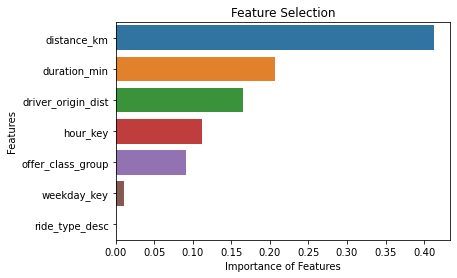

In [56]:
# Show Visulizatioin in Seaborn

import matplotlib.pyplot as plt
import seaborn as snn

snn.barplot(x = feature_imp, y = feature_imp.index)
plt.ylabel('Features')
plt.xlabel('Importance of Features')
plt.title('Feature Selection')
plt.show()

In [57]:
feature_imp

distance_km           0.413297
duration_min          0.206947
driver_origin_dist    0.165157
hour_key              0.111935
offer_class_group     0.091406
weekday_key           0.011235
ride_type_desc        0.000022
dtype: float64

Feature Selection and rebuilding Random Forest Model..

In [65]:
from sklearn.feature_selection import SelectFromModel

feature_sel = SelectFromModel(model2, threshold=0.2)
feature_sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(max_depth=5, n_estimators=200,
                                                 random_state=1),
                threshold=0.2)

In [59]:
x_imp_train = feature_sel.transform(x_train)
x_imp_test = feature_sel.transform(x_test)

In [67]:
x_imp_train.shape

(502482, 4)

In [68]:
model2_imp_feature = RandomForestClassifier(n_estimators = 200, criterion = 'gini', random_state = 1, max_depth = 5)
model2_imp_feature.fit(x_imp_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=1)

In [69]:
y_pred_RF_imp = model2.predict(x_test)

In [70]:
print('Confusion Matrix:' ,mtr.confusion_matrix(y_test, y_pred_RF_imp))

print('Accuracy:' ,mtr.accuracy_score(y_test, y_pred_RF_imp))

print('Precision' ,mtr.precision_score(y_test, y_pred_RF_imp))

print('Recall' ,mtr.recall_score(y_test, y_pred_RF_imp))

print('F1 Score' ,mtr.f1_score(y_test, y_pred_RF_imp))

print('AUC ROC' ,mtr.roc_auc_score(y_test, y_pred_RF_imp))

Confusion Matrix: [[ 6113 28136]
 [ 2755 88617]]
Accuracy: 0.754093662683787
Precision 0.7590126163781659
Recall 0.9698485312787287
F1 Score 0.8515747747747748
AUC ROC 0.5741677472008698
